In [2]:
using QuantumCollocation
using NamedTrajectories
using LinearAlgebra
# using SignalAnalysis
# using Unitful
using HDF5
using JLD2

In [6]:
data_path = "data/levels_2_2_2_2_drives_1_2_3_4_T_100_dt_2.0_dda_0.0001_a_0.02_max_iter_500_00000.jld2"
data = load_problem(data_path; return_data=true)
traj = data["trajectory"]

Loading data dict from data/levels_2_2_2_2_drives_1_2_3_4_T_100_dt_2.0_dda_0.0001_a_0.02_max_iter_500_00000.jld2:

   duration = 269.37739598818996
   final_fidelity = 0.9998887103055963


NamedTrajectory{Float64}([1.0 1.0 … 0.006717193669950849 0.0012713905196281821; 0.0 7.11362322956486e-20 … -0.0009218614914072136 -0.0008953465157783166; … ; -5.115580038992747e-5 -6.771547167356496e-5 … 1.1898595983365079e-9 5.308382560774798e-21; 2.7209837978605065 2.7209837978605065 … 2.7209837978605065 2.7209837978605065], [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  -0.0008745808560641302, 5.308382560774798e-21, -5.308382560774798e-21, -5.308382560774798e-21, 5.308382560774798e-21, 5.308382560774798e-21, 5.308382560774798e-21, 5.308382560774798e-21, 5.308382560774798e-21, 2.7209837978605065], 100, :Δt, 537, (Ũ⃗ = 512, a = 8, da = 8, dda = 8, Δt = 1, states = 528, controls = 9), (a = ([-0.02, -0.02, -0.02, -0.02, -0.02, -0.02, -0.02, -0.02], [0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]), dda = ([-0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001, -0.0001], [0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001, 0.0001]), Δt = ([1.0], [3.0])), (Ũ⃗ = [1.0, 0.

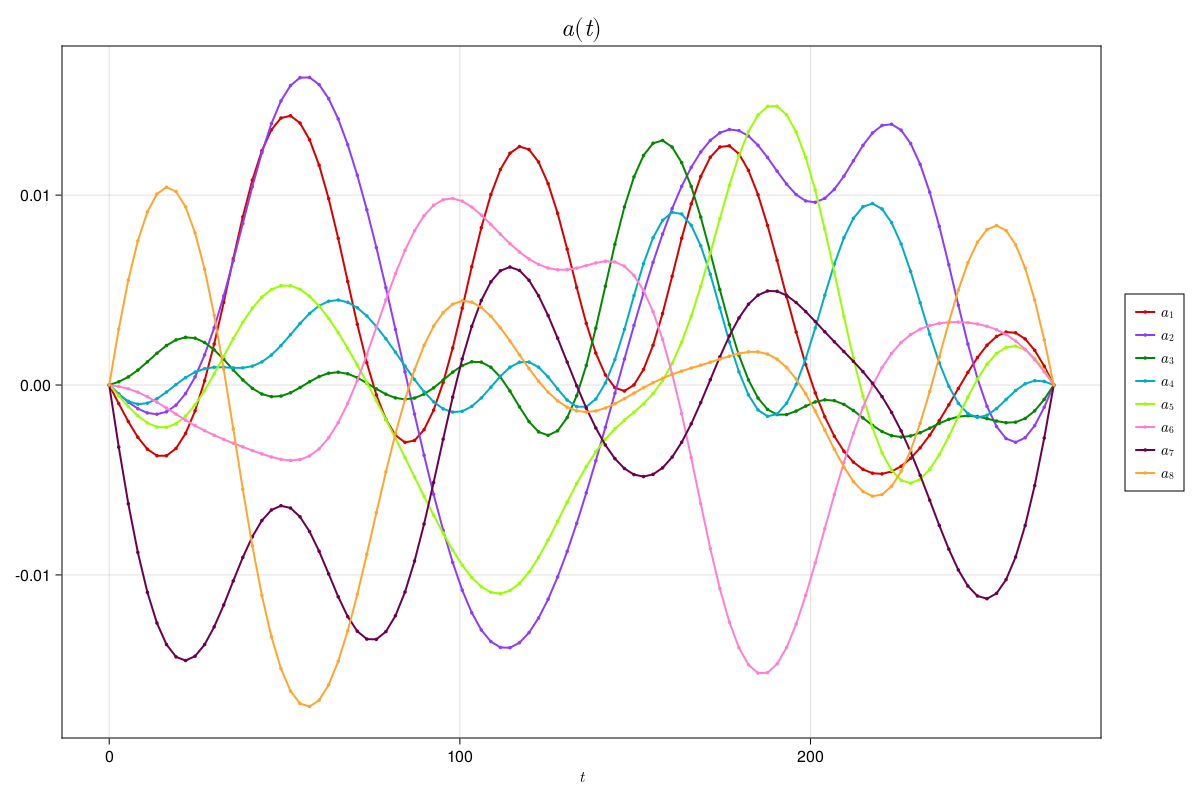

In [7]:
plot(traj, [:a])

In [8]:
pulse = traj.a
ts = times(traj)

100-element Vector{Float64}:
   0.0
   2.7209837978605065
   5.441967595721013
   8.162951393581519
  10.883935191442026
  13.604918989302533
  16.325902787163038
  19.046886585023543
  21.76787038288405
  24.488854180744553
   ⋮
 247.60952560530583
 250.33050940316633
 253.05149320102683
 255.77247699888733
 258.49346079674785
 261.2144445946084
 263.9354283924689
 266.65641219032943
 269.37739598818996

In [9]:
# save pulse and times
pulse_path = "data/pulse_all_drives_1.hdf5"
pulse_file = h5open(pulse_path, "w")
pulse_file["pulse"] = pulse
pulse_file["ts"] = ts
close(pulse_file)


In [9]:
# load pulse and times
pulse_path = "data/pulse.hdf5"
pulse_file = h5open(pulse_path, "r")
pulse_file["pulse"][:,:]

2×100 Matrix{Float64}:
 0.0   0.00254727    0.00505691   …  0.00505566   0.00254656   0.0
 0.0  -0.000218839  -0.000436656     0.000442186  0.000221585  0.0

In [ ]:

Δt = traj[end].Δt[1] # ns
fs = (1 / Δt)u"GHz" # GHz

In [35]:
pulse = signal(collect(pulse'), fs)

SampledSignal @ 1.3633875e9 Hz, 100×2 Matrix{Float64}:
 0.0          0.0
 0.00254727  -0.000218839
 0.00505691  -0.000436656
 0.0075217   -0.000652447
 0.00993888  -0.000865229
 0.012307    -0.00107405
 0.0146252   -0.00127798
 0.0168927   -0.00147614
 0.0191093   -0.00166768
 0.0212746   -0.00185182
 ⋮           
 0.0191064    0.00169216
 0.01689      0.0014971
 0.0146226    0.00129558
 0.0123047    0.00108845
 0.00993687   0.000876561
 0.00752003   0.00066083
 0.00505566   0.000442186
 0.00254656   0.000221585
 0.0          0.0

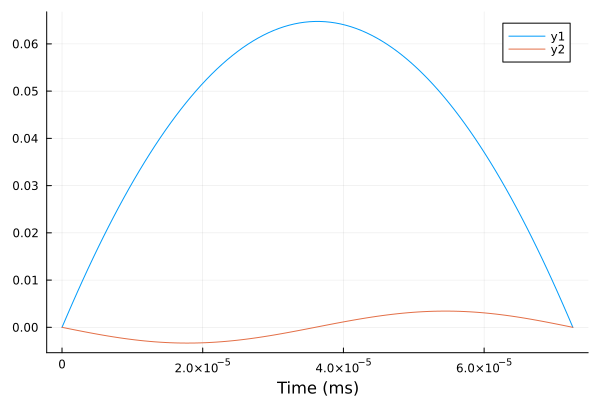

In [27]:
Plots.plot(pulse)
# save the plot
savefig("plots/limited_drives_T_100_dt_1.0_dda_0.0001_a_0.12566370614359174_max_iter_100_00000.png")

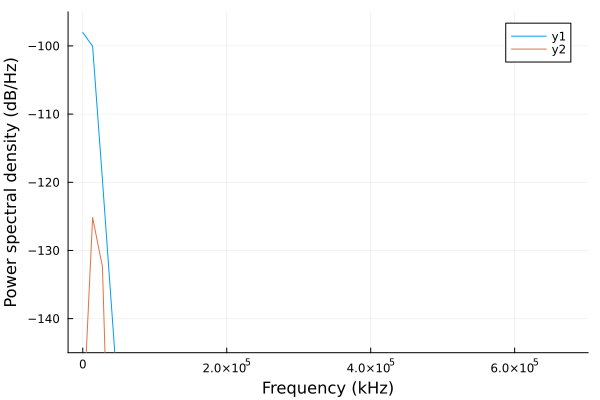

In [38]:
psd(pulse; nfft=size(pulse, 1))
# savefig("plots/limited_drives_freqs.png")

In [37]:
y1 = tfd(pulse[:,1], Spectrogram())

SignalAnalysis.TFD{Float64}(Matrix{Float64}(undef, 129, 0), Float32[0.0, 5.3257325f6, 1.0651465f7, 1.5977198f7, 2.130293f7, 2.6628662f7, 3.1954396f7, 3.728013f7, 4.260586f7, 4.793159f7  …  6.337622f8, 6.390879f8, 6.4441363f8, 6.497394f8, 6.550651f8, 6.6039085f8, 6.6571654f8, 6.710423f8, 6.76368f8, 6.8169376f8], 9.388379908303694e-8:1.8776759816607387e-7:-9.388379908303694e-8)